In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

plt.rcParams['figure.figsize'] = [16, 8]

In [2]:
xC = np.array([2, 1], dtype=np.float32)  # centre
sig = np.array([2, .5], dtype=np.float32)  # principal axes
theta = np.pi / 3.  # rotation angle

In [3]:
R = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)],
    ], dtype=np.float32)
n = 1000  # 10,000 points
X = np.random.randn(2, n)  # generate random points
X = np.diag(sig) @ X  # stretch
X = R @ X  # rotation
X = X + np.diag(xC) @ np.ones((2, n))  # translation
X.shape

(2, 1000)

In [4]:
Matrix(R)

Matrix([
[     0.5, -0.866025],
[0.866025,       0.5]])

In [5]:
X_avg = np.mean(X, axis=1)
print('X_avg', X_avg)
X_avg = np.reshape(X_avg, (-1, 1))
B = X - X_avg  # 0 mean
B = B.astype(np.float32)
print('B', B.shape)
# C = B.T @ B
U, S, VT = np.linalg.svd(B/np.sqrt(n), full_matrices=False)
print(U.shape, S.shape, VT.shape)
S = np.diag(S)

alpha = 2 * np.pi * np.arange(0, 1, .01)
print('alpha', alpha.shape)

# 1-std confidence interval
X_std = U @ S @ np.array([np.cos(alpha), np.sin(alpha)], dtype=np.float32)
print('X_std', X_std.shape)

X_avg [2.00894647 1.0015084 ]
B (2, 1000)
(2, 2) (2,) (2, 1000)
alpha (100,)
X_std (2, 100)


In [6]:
Matrix(U)

Matrix([
[-0.504087, -0.863653],
[-0.863653,  0.504087]])

In [7]:
Matrix(S)

Matrix([
[1.95387,      0.0],
[    0.0, 0.493155]])

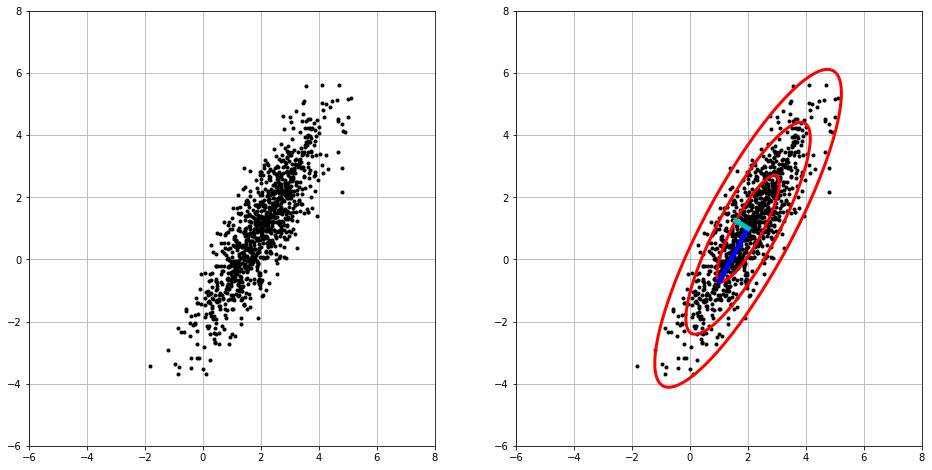

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0,:], X[1,:], '.', c='k')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6, 8))

ax2 = fig.add_subplot(122)
ax2.plot(X[0,:],X[1,:], '.', c='k')   # Plot data to overlay PCA
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

ax2.plot(X_avg[0] + X_std[0,:], X_avg[1] + X_std[1,:], '-', c='r', linewidth=3)
ax2.plot(X_avg[0] + 2*X_std[0,:], X_avg[1] + 2*X_std[1,:], '-', c='r', linewidth=3)
ax2.plot(X_avg[0] + 3*X_std[0,:], X_avg[1] + 3*X_std[1,:], '-', c='r', linewidth=3)

ax2.plot(np.array([X_avg[0,0], X_avg[0,0]+U[0,0]*S[0,0]]),
         np.array([X_avg[1,0], X_avg[1,0]+U[1,0]*S[0,0]]), '-', c='b', linewidth=5)
ax2.plot(np.array([X_avg[0,0], X_avg[0,0]+U[0,1]*S[1,1]]),
         np.array([X_avg[1,0], X_avg[1,0]+U[1,1]*S[1,1]]), '-', c='c', linewidth=5)
plt.show()